<a href="https://colab.research.google.com/github/italolima04/monitoria-probabilidade-estatistica/blob/master/Pesquisa-PID/An%C3%A1lise-Descritiva-Tweets/An%C3%A1lise_Descritiva_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Por que explorar a Base de Dados do Twitter ?

* Em 2019 o Brasil ocupava a 6º posição do ranking de países com maior quantidade de usuários do Twitter.

* Pesquisas de 2020 apontam que cerca de 141 milhões de usuários são dos Estados Unidos e o Brasil ocupa o segundo lugar obtendo a cifra de 41 milhões, depois de um crescimento de 23% desde o início do ano. 

* 500 milhões de tweets são postados por dia, o que quantifica cerca de 6000 tweets por segundo.

* Existe um total de 1.3 bilhões de Contas do Twitter, e estima-se que 328 milhões estejam ativas.



**Em razão da pandemia da Covid-19, as pessoas têm recorrido mais ainda ao Twitter para acompanhar os fatos em tempo real.**

* Segundo a própria empresa, o número de usuários ativos monetizáveis chegou a 164 milhões, durante o primeiro trimestre de 2020, superando em 23% o ano anterior. 

* Além disso, houve um crescimento de 45% registrado após o primeiro trimestre no uso das páginas especiais de curadoria (há uma específica para a covid) e de 30% no envio de mensagens diretas.

# Acessando a API

**Dados são informações, derivadas de observações, contagens, explorações ou respostas.**

No contexto de redes sociais, a análise de sentimentos apresenta diversos potenciais objetivos, nesse caso, o cunho social é o enfoque, visto que em um período pandêmico é importante reconhecer o sentimento das pessoas em torno dos fatos ocorridos, isso pode servir como base na tomada de decisões por parte de governos e empresas.

In [1]:
#Importando a biblioteca Tweepy e Pandas
import tweepy as tp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Para este exemplo prático envolvendo a coleta e o pré-processamento de dados do Twitter, iremos utilizar uma amostra (uma parcela dos dados), que serão coletados a partir da API da própria rede social.**


"Uma API é um conjunto de rotinas e padrões estabelecidos por um software.” 

As API's são uma forma de integrar sistemas e conectar aplicações.


In [2]:
#Manipulando arquivos em Python para leitura de um documento local que contém as 4 chaves de acesso.
#Atribuindo cada chave a uma variável.
with open ('twitter_tokens.txt', 'r') as dados:
  chave_consumidor = dados.readline().strip('\n')
  segredo_consumidor = dados.readline().strip('\n')
  token_acesso = dados.readline().strip('\n')
  token_acesso_segredo = dados.readline().strip('\n')

In [3]:
#Preenchendo as informações de autenticação através dados do consumidor. (Analogia ao Login)
autenticacao = tp.OAuthHandler(chave_consumidor, segredo_consumidor)

In [4]:
#Preenchendo os tokens de acesso. (Analogia a senha)
autenticacao.set_access_token(token_acesso, token_acesso_segredo)

In [5]:
#Concluindo o Processo de Autenticação e criando instância da API.
twitter = tp.API(autenticacao)

**Configurando Exibição dos Dados.**

In [6]:
#Utilizando o método de busca, e passando o q(query) como parâmetro. (O "q" se deseja buscar).
#Percorrendo os tweets buscados e exibindo algumas informações, como nome do usuário e texto publicado (tweet).
tweets = twitter.search(q='coronavirus')
for tweet in tweets:
  print(f'Usuário: {tweet.user.screen_name} - Tweet: {tweet.text}')

Usuário: SportsGrad2010 - Tweet: RT @CBSNews: Nearly 84% of Florida's ICU beds are filled amid rising coronavirus cases https://t.co/lXMO5wUbCk
Usuário: charleskirby981 - Tweet: RT @drdavidsamadi: Calling the coronavirus in America uncontrolled is simply untrue.

We have many treatments to minimize the effects of th…
Usuário: juliemoss101 - Tweet: RT @guidedogs: "The guide dog cannot read one-way arrows" Why people with sight loss need support and understanding as lockdown eases and s…
Usuário: maureentesoro - Tweet: RT @samanthajgross: In Miami-Dade County, we can see hospitalization data but the state isn’t releasing the data for other counties.

State…
Usuário: Tommy_2Tall - Tweet: RT @MollyJongFast: If trump had spent as much time on coronavirus as he has on harassing Ilhan Omar, her father might still be alive and no…
Usuário: honnenogod - Tweet: RT @washingtonpost: Fact Checker: Trump’s four-Pinocchio claim that 99 percent of coronavirus cases are "totally harmless" https://t.co/

In [7]:
#Visualizando as propriedades que um tweet contém.
tweet._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Jul 08 11:57:37 +0000 2020',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 759251,
    'id_str': '759251',
    'indices': [3, 7],
    'name': 'CNN',
    'screen_name': 'CNN'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1280833416750137346,
 'id_str': '1280833416750137346',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 113,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
  'coordinates': None,
  'created_at': 'Wed Jul 08 10:47:42 +0000 2020',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [{'display_url': 'twitter.com/i/web/status/1…',
     'expanded_url': 'https://twitte

In [8]:
#Visualizando as propriedades do Json, retornada para um tweet.
tweet._json.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [9]:
#Criando um dicionário vazio.
tweets_dict = {}
#Preenchendo o dicionário com as informações (Json) dos tweets. Essas serão as chaves do dicionário.
tweets_dict = tweets_dict.fromkeys(tweet._json.keys())

In [10]:
#Visualizando o dicionário.
tweets_dict

{'contributors': None,
 'coordinates': None,
 'created_at': None,
 'entities': None,
 'favorite_count': None,
 'favorited': None,
 'geo': None,
 'id': None,
 'id_str': None,
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': None,
 'lang': None,
 'metadata': None,
 'place': None,
 'retweet_count': None,
 'retweeted': None,
 'retweeted_status': None,
 'source': None,
 'text': None,
 'truncated': None,
 'user': None}

In [11]:
#Definindo e configurando query de busca.
query_busca = 'coronavirus' + "-filter:retweets"
#Aplicando a query que deve ser buscada e configurando a opção para eliminar retweets.

In [12]:
#Configurando o cursor para a busca, definindo a query e a quantidade de itens.
cursor_tweets = tp.Cursor(twitter.search, q=query_busca).items(2500)

In [13]:
#Para todos os tweets filtrados, percorrer as chaves deste tweet e adicionar a lista de tweets, capturando assim os seus valores.
#Tratamento de exceções para valores vazios (nulos).
for tweet in cursor_tweets:
    for key in tweets_dict.keys():
        try:
            twvalue = tweet._json[key]
            tweets_dict[key].append(twvalue)
        except KeyError:
            twvalue = ""
            if (tweets_dict[key] is None):
                tweets_dict[key] = [twvalue]
            else:
                tweets_dict[key].append(twvalue)
        except:
            tweets_dict[key] = [twvalue]

O tratamento de exceções acima é para casos em que o tweet vem "vazio" ou inválido, por algum problema na requisição da API.

# Criando Data Frame e Visualizando os Dados

In [14]:
#Criando Data Frame vazio.
df = pd.DataFrame()

In [15]:
#Método Pandas para preencher o Data Frame a partir de um Dicionário.
df = pd.DataFrame.from_dict(tweets_dict)

In [16]:
#Visualizando os dados. 
df.head(10)

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,Wed Jul 08 11:57:52 +0000 2020,1280833479832461312,1280833479832461312,@KhayaJames @eNCA I just think that going to s...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.280822e+18,1280822147812909057,1.456546e+09,1456545516,KhayaJames,"{'id': 1275555694578671616, 'id_str': '1275555...",None,None,None,None,,False,0,0,False,False,en
1,Wed Jul 08 11:57:52 +0000 2020,1280833478922248192,1280833478922248192,"Iran – Emergenza Coronavirus, stop a matrimoni...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'it', 'result_type': 're...","<a href=""http://publicize.wp.com/"" rel=""nofoll...",NaN,None,NaN,None,None,"{'id': 731398656583143425, 'id_str': '73139865...",None,None,None,None,,False,0,0,False,False,it
2,Wed Jul 08 11:57:52 +0000 2020,1280833478867722240,1280833478867722240,Investing in low-carbon jobs offers huge poten...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://buffer.com"" rel=""nofollow"">Bu...",NaN,None,NaN,None,None,"{'id': 2479789014, 'id_str': '2479789014', 'na...",None,None,None,None,,False,0,0,False,False,en
3,Wed Jul 08 11:57:52 +0000 2020,1280833478326718465,1280833478326718465,@Gastro_original Bolsonaro muere por coronavir...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.280821e+18,1280820701205876737,1.222255e+18,1222254731512483842,Gastro_original,"{'id': 1224340550322737153, 'id_str': '1224340...",None,None,None,None,,False,0,0,False,False,es
4,Wed Jul 08 11:57:52 +0000 2020,1280833477768884226,1280833477768884226,@NewDay https://t.co/Gw4fJ3Acic,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",1.280832e+18,1280831684380954627,1.375289e+09,1375289149,NewDay,"{'id': 307913758, 'id_str': '307913758', 'name...",None,None,None,None,,False,0,0,False,False,und
5,Wed Jul 08 11:57:52 +0000 2020,1280833477643026432,1280833477643026432,माननीय मुख्यमंत्री जनाब @ArvindKejriwal जी कि ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'hi', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 3646453512, 'id_str': '3646453512', 'na...",None,None,None,None,,False,0,0,False,False,hi
6,Wed Jul 08 11:57:51 +0000 2020,1280833471678763008,1280833471678763008,mundo/\n\nUn estudio hecho en España desalient...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 812113972455477248, 'id_str': '81211397...",None,None,None,None,,False,0,0,False,False,es
7,Wed Jul 08 11:57:50 +0000 2020,1280833469971652610,1280833469971652610,WHO confirms there's 'emerging evidence' of ai...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 946009945, 'id_str': '946009945', 'name...",None,None,None,None,,False,0,0,False,False,en
8,Wed Jul 08 11:57:49 +0000 2020,1280833464049287168,1280833464049287168,@rody21901 @kp10003 @nytimes https://t.co/8KZz...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",1.280831e+18,1

In [17]:
#Visualizando a estrutura do DataFrame.
df.shape

(2500, 25)

**Podemos salvar esses dados em um arquivo CSV, formato utilizado para planilhas, onde os dados são separados por vírgulas.**

In [18]:
df.to_csv('coronavirus.csv')

In [19]:
#Método para visualizar as colunas do Data Frame.
df.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang'],
      dtype='object')

**É notória a quantidade de propriedades de um tweet que não contribuem para a análise, por isso podemos selecionar somente as features de interesse.**

In [20]:
#Selecionando somente as colunas de interesse e substituindo o Data Frame original.
df = df[['created_at', 'id', 'text', 'user', 'geo', 'coordinates', 'place', 'lang']]
#Visualizando às 5 primeiras linhas do Data Frame.
df.head()

,created_at,id,text,user,geo,coordinates,place,lang
0,Wed Jul 08 11:57:52 +0000 2020,1280833479832461312,@KhayaJames @eNCA I just think that going to s...,"{'id': 1275555694578671616, 'id_str': '1275555...",None,None,None,en
1,Wed Jul 08 11:57:52 +0000 2020,1280833478922248192,"Iran – Emergenza Coronavirus, stop a matrimoni...","{'id': 731398656583143425, 'id_str': '73139865...",None,None,None,it
2,Wed Jul 08 11:57:52 +0000 2020,1280833478867722240,Investing in low-carbon jobs offers huge poten...,"{'id': 2479789014, 'id_str': '2479789014', 'na...",None,None,None,en
3,Wed Jul 08 11:57:52 +0000 2020,1280833478326718465,@Gastro_original Bolsonaro muere por coronavir...,"{'id': 1224340550322737153, 'id_str': '1224340...",None,None,None,es
4,Wed Jul 08 11:57:52 +0000 2020,1280833477768884226,@NewDay https://t.co/Gw4fJ3Acic,"{'id': 307913758, 'id_str': '307913758', 'name...",None,None,None,und


# Explorando os Dados

In [21]:
#Método para verificar a quantidade de dados nulos.
df.isna().sum()

created_at        0
id                0
text              0
user              0
geo            2496
coordinates    2496
place          2438
lang              0
dtype: int64

Podemos verificar a elevada porcentagem de tweets que não possuem dados sobre a localização, isso é prejudicial para uma análise geográfica.

**É possível verificar as linguagens dos tweets filtrados, dessa forma:**

In [22]:
df['lang'].unique()

array(['en', 'it', 'es', 'und', 'hi', 'fr', 'pt', 'ro', 'ca', 'de', 'ar',
       'ja', 'nl', 'kn', 'in', 'sd', 'tl', 'ur', 'fa', 'tr', 'cy', 'ta',
       'el', 'ml', 'gu', 'te', 'or', 'sv', 'pl', 'th', 'km', 'mr', 'da',
       'zh'], dtype=object)

**Podemos verificar a distribuição dos tweets para cada linguagem.**

In [23]:
df['lang'].value_counts()

en     1571
es      415
pt      123
und     122
fr       67
it       38
ca       27
de       25
hi       25
nl       14
in       13
ja       12
tr        9
ro        5
ar        5
tl        4
ta        3
kn        3
gu        2
ur        2
el        2
mr        1
km        1
th        1
pl        1
te        1
cy        1
sv        1
ml        1
da        1
zh        1
fa        1
or        1
sd        1
Name: lang, dtype: int64

**Também é possível verificar a porcentagem relativa para tal distribuição.**

In [24]:
df['lang'].value_counts(normalize=True)

en     0.6284
es     0.1660
pt     0.0492
und    0.0488
fr     0.0268
it     0.0152
ca     0.0108
de     0.0100
hi     0.0100
nl     0.0056
in     0.0052
ja     0.0048
tr     0.0036
ro     0.0020
ar     0.0020
tl     0.0016
ta     0.0012
kn     0.0012
gu     0.0008
ur     0.0008
el     0.0008
mr     0.0004
km     0.0004
th     0.0004
pl     0.0004
te     0.0004
cy     0.0004
sv     0.0004
ml     0.0004
da     0.0004
zh     0.0004
fa     0.0004
or     0.0004
sd     0.0004
Name: lang, dtype: float64

In [25]:
#Criando array com as linguagens, para manipulação futura.
languages = df['lang'].unique()

In [26]:
#Tornando-o um array de strings.
languages.astype('str')

array(['en', 'it', 'es', 'und', 'hi', 'fr', 'pt', 'ro', 'ca', 'de', 'ar',
       'ja', 'nl', 'kn', 'in', 'sd', 'tl', 'ur', 'fa', 'tr', 'cy', 'ta',
       'el', 'ml', 'gu', 'te', 'or', 'sv', 'pl', 'th', 'km', 'mr', 'da',
       'zh'], dtype='<U3')

**Dada essa manipulação, podemos visualizar essa distribuição de forma gráfica.**

Utilizaremos as bibliotecas Seaborn e Matplotlib.

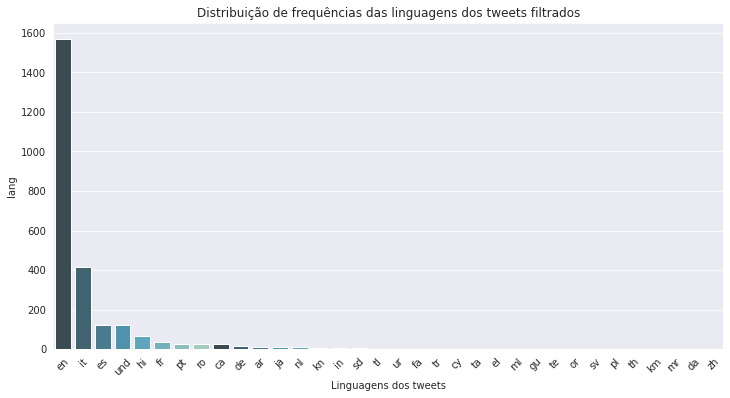

In [28]:
#Definindo o estilo para o gráfico.
sns.set_style('darkgrid')

#Configurando o tamanho da figura a ser gerada.
plt.figure(figsize=(12, 6))

#Configurações de exibição: Título e rótulos.
plt.title('Distribuição de frequências das linguagens dos tweets filtrados')
plt.ylabel('Frequência')
plt.xlabel('Linguagens dos tweets')

#Posicionando os ticks do eixo X, aplicando rotação de 45º graus.
plt.xticks(rotation=45)

#Gerando gráfico de barras para a distribuição dos tweets a partir da linguagem.
sns.barplot(x=languages, y=df['lang'].value_counts(),
            palette=sns.color_palette('GnBu_d' ,n_colors=8))

#Exibindo gráfico
plt.show()

In [29]:
#Filtrando somente os tweets cuja linguagem é o inglês.
en = df.loc[df.lang == 'en', :]
en = en['lang'].value_counts().sum()
en

1571

In [30]:
#Filtrando os tweets cuja linguagem não é o inglês.
others = df.loc[df.lang != 'en', :]
others = others['lang'].value_counts().sum()
others

929

**Visto que o inglês se apresenta como o idioma principal para a nossa amostra, podemos comparar a frequência dos tweets entre essa língua e as demais.**

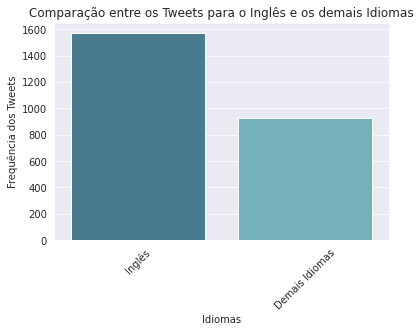

In [31]:
sns.set_style('darkgrid')

plt.title('Comparação entre os Tweets para o Inglês e os demais Idiomas')
plt.ylabel('Frequência dos Tweets')
plt.xlabel('Idiomas')

plt.xticks(rotation=45)

sns.barplot(x=['Inglês', 'Demais Idiomas'], y=[en, others], palette=sns.color_palette('GnBu_d' ,n_colors=2))

plt.show()

**Para começarmos a trabalharmos com os dados de texto, podemos verificar descrições estatísticas em torno dos mesmos.**

Tweets podem ter no máximo 288 caracteres, mas qual será por exemplo o tamanho médio para essa amostra ?

In [32]:
#Criando uma lista vazia.
size_tweets = []
#Percorrendo todos as linhas do data frame, na coluna de text e aplicando a contagem de caracteres através da função len() do python.
for tweet in df['text']:
  size = 0
  size = len(tweet)
  #Adicionando esses tamanhos a lista, para posterior adição no Data Frame.
  size_tweets.append(size)

In [33]:
#Visualizando a lista com os tamanhos para cada tweet.
size_tweets

[139,
 81,
 140,
 91,
 31,
 139,
 131,
 105,
 52,
 140,
 140,
 140,
 134,
 127,
 125,
 126,
 137,
 111,
 58,
 140,
 23,
 138,
 139,
 105,
 140,
 138,
 23,
 140,
 140,
 140,
 138,
 140,
 63,
 139,
 125,
 118,
 138,
 140,
 140,
 140,
 140,
 140,
 139,
 48,
 123,
 23,
 137,
 140,
 139,
 64,
 108,
 144,
 140,
 140,
 111,
 23,
 105,
 143,
 100,
 140,
 139,
 140,
 111,
 140,
 116,
 122,
 89,
 79,
 134,
 121,
 125,
 122,
 77,
 53,
 140,
 140,
 103,
 140,
 114,
 137,
 139,
 140,
 131,
 103,
 84,
 140,
 140,
 111,
 139,
 140,
 140,
 140,
 107,
 128,
 139,
 140,
 139,
 60,
 135,
 140,
 123,
 140,
 140,
 140,
 143,
 96,
 140,
 140,
 138,
 69,
 72,
 140,
 131,
 140,
 140,
 79,
 140,
 140,
 140,
 140,
 140,
 117,
 140,
 140,
 139,
 140,
 92,
 130,
 74,
 140,
 111,
 105,
 140,
 140,
 79,
 99,
 139,
 93,
 111,
 69,
 23,
 114,
 130,
 140,
 140,
 140,
 82,
 62,
 139,
 105,
 131,
 140,
 137,
 140,
 98,
 136,
 140,
 140,
 101,
 140,
 116,
 140,
 119,
 140,
 79,
 67,
 140,
 75,
 140,
 140,
 140,
 37,
 140

In [34]:
#Criando uma nova coluna no Data Frame, com o tamanho respectivo para cada tweet, de acordo com o índice.
df['size_tweets'] = size_tweets
df.head()

,created_at,id,text,user,geo,coordinates,place,lang,size_tweets
0,Wed Jul 08 11:57:52 +0000 2020,1280833479832461312,@KhayaJames @eNCA I just think that going to s...,"{'id': 1275555694578671616, 'id_str': '1275555...",None,None,None,en,139
1,Wed Jul 08 11:57:52 +0000 2020,1280833478922248192,"Iran – Emergenza Coronavirus, stop a matrimoni...","{'id': 731398656583143425, 'id_str': '73139865...",None,None,None,it,81
2,Wed Jul 08 11:57:52 +0000 2020,1280833478867722240,Investing in low-carbon jobs offers huge poten...,"{'id': 2479789014, 'id_str': '2479789014', 'na...",None,None,None,en,140
3,Wed Jul 08 11:57:52 +0000 2020,1280833478326718465,@Gastro_original Bolsonaro muere por coronavir...,"{'id': 1224340550322737153, 'id_str': '1224340...",None,None,None,es,91
4,Wed Jul 08 11:57:52 +0000 2020,1280833477768884226,@NewDay https://t.co/Gw4fJ3Acic,"{'id': 307913758, 'id_str': '307913758', 'name...",None,None,None,und,31


**Média:**

In [35]:
df['size_tweets'].mean()

118.7332

**Mediana:**

In [36]:
df['size_tweets'].median()

134.0

**Podemos verificar essas e outras medidas estatísticas através de um simples método do Pandas.**

In [37]:
#Arredondando os valores float e os tornando inteiros.
df['size_tweets'].describe().round().astype('int')

count    2500
mean      119
std        29
min        19
25%       104
50%       134
75%       140
max       164
Name: size_tweets, dtype: int64

**Temos aqui medidas de posição, variação e de tendência central.**



**count** = Quantidade de tweets.

**mean** = Tamanho médio (em caracteres) dos tweets.

**std** = Desvio padrão para o tamanho (em caracteres) dos tweets.

**min** = Entrada miníma, ou seja: tweet com menor número de caracteres.

**25**% = 1º Quartil dos dados.

**50**% = 2º Quartil dos dados e respectivamente a mediana.

**75**% = 3º Quartil dos dados.

**max** = Entrada máxima, ou seja: tweet com maior número de caracteres.

Podemos representar as medidas de posição através do Gráfico Box-Plot, ou também conhecido como gráfico de caixa e bigodes.

Nele, há a representação dos quartis e das entradas máxima e mínima, dos dados.

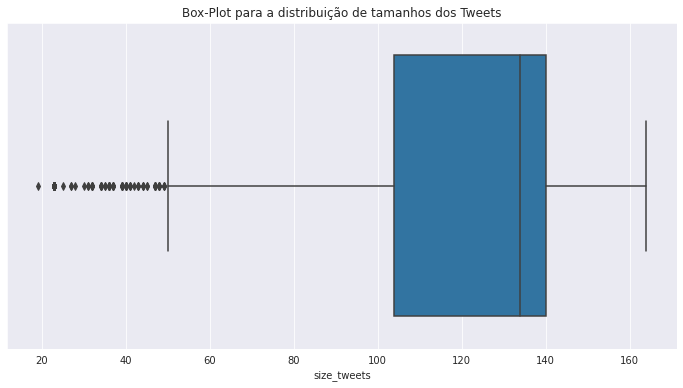

In [38]:
#Confiruando tamanho da figura.
plt.figure(figsize=(12, 6))

#Definindo título para o Gráfico.
plt.title('Box-Plot para a distribuição de tamanhos dos Tweets')

#Gerando gráfico a partir da coluna com o tamanho dos tweets.
sns.boxplot(df['size_tweets'])

#Exibindo gráfico.
plt.show()

# Preprocessando os Dados

**Para a etapa de Pré-processamento utilizaremos somente os dados de texto, que são referentes ao conteúdo em si, dos tweets.**

In [39]:
#Importando Bibliotecas e Módulos para Pré-Processamento.
import nltk
nltk.download('stopwords')
nltk.download('rslp')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


**Agora iremos trabalhar apenas com os dados de Texto, ou seja: iremos extrair os dados da coluna referente ao conteúdo do Tweet.**

In [40]:
#Padrão utilizado em estudos de Aprendizado de Máquina.
X = df['text']
X

0       @KhayaJames @eNCA I just think that going to s...
1       Iran – Emergenza Coronavirus, stop a matrimoni...
2       Investing in low-carbon jobs offers huge poten...
3       @Gastro_original Bolsonaro muere por coronavir...
4                         @NewDay https://t.co/Gw4fJ3Acic
                              ...                        
2495    爲什麼CCP在疫情爆發期間要求人們戴口罩?爲什麼CCP要把海外的面具都买下然後運回中國?因爲...
2496    Quando uno è un tdc, lo è sempre.\n\nCoronavir...
2497    City of Weston COVID-19 Data for July 8th, 202...
2498    Kenyans: Do you know anyone who has contracted...
2499    @pmbjpbppi @PMOIndia @DVSadanandGowda @mansukh...
Name: text, Length: 2500, dtype: object

**Com esses dados, podemos fazer um processo famoso na análise descritivo de dados, que é a geração de uma Word Cloud, ou nuvem de palavras, que exibe as palavras mais frequentes nos textos filtrados.**

In [41]:
#Agrupando todos os dados de Texto.
summary = " ".join(s for s in X)

In [42]:
#Visualizando os dados.
summary

'@KhayaJames @eNCA I just think that going to school it totally putting our lives as students and teachers in grave… https://t.co/BrQc2n5AoS Iran – Emergenza Coronavirus, stop a matrimoni e\xa0funerali https://t.co/q3PfwCUlRr Investing in low-carbon jobs offers huge potential for ‘levelling up’ the UK, offsetting the damage done to local e… https://t.co/moMXgxt8MU @Gastro_original Bolsonaro muere por coronavirus, mi profecía solo es a 15 días vista jajaj @NewDay https://t.co/Gw4fJ3Acic माननीय मुख्यमंत्री जनाब @ArvindKejriwal जी कि दिल्ली की जनता से अपील है  कोरोना से ठीक होकर आया हुआ व्यक्ति हो सके… https://t.co/qwYmpDvLxe mundo/\n\nUn estudio hecho en España desalienta la esperanza de la inmunidad de rebaño contra el coronavirus… https://t.co/A5ScMOTBlK WHO confirms there\'s \'emerging evidence\' of airborne transmission of coronavirus\n\nhttps://t.co/Hr63QkpZGI @rody21901 @kp10003 @nytimes https://t.co/8KZzLzvcRS Great News!!! Texas pass 10k new cases in one day!\n\nTesting has incre

In [43]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [44]:
#Criando instância para uma WordCloud e configurando seus parâmetros.
wordcloud = WordCloud(background_color="black",
                      width=1600, height=800,
                      max_words=200, max_font_size=200,
                      min_font_size=10).generate(summary)

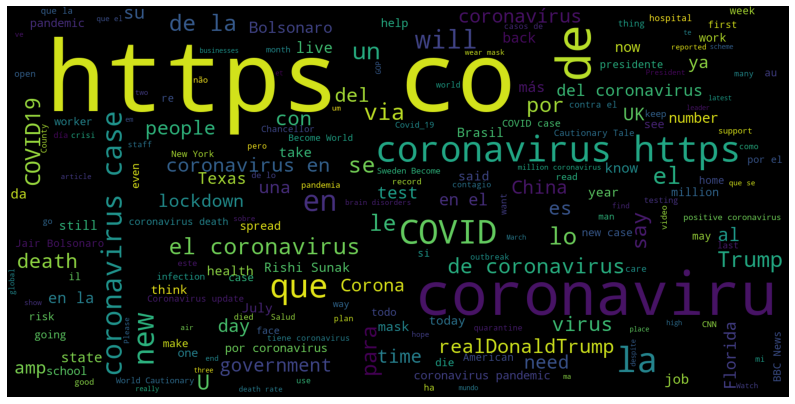

In [46]:
#Configurando exibição da imagem.
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

**Podemos verificar que sem a remoção de stop words, a visualização fica poluída, demarcada por links, urls e palavras que não contribuem para a análise.**

Para isso, podemos aplicar uma famosa técnica de pré-processamento de texto. Como os tweets para o inglês compõem a maior parte do nosso corpus, podemos começar filtrando somente eles.

In [144]:
english = df.loc[df.lang == 'en', 'text']

**Stop words são palavras que podem ser consideradas irrelevantes para o conjunto de resultados.**

Exemplos: as, os, um, uma, com, de, da, para, etc.

In [145]:
def Remove_stopWords(instance):
  #Utiliza os recursos da biblioteca NLTK para verificar as Stopwords para o Inglês.
  stopwords = set(nltk.corpus.stopwords.words('english'))
  #Cria uma lista com as palavras restantes (Não Stopwords).
  words = [i for i in instance.split() if not i in stopwords]
  #Retorna a lista de palavras em formato de string.
  return(" ".join(words))

In [146]:
#Aplicação da remoção de StopWords nos nossos dados de texto.
english = [Remove_stopWords(i) for i in english]

**Devemos também aplicar uma limpeza nos dados. Por serem advindos de uma rede social é marcante a presença de links, urls e sinais de pontuação**

Podemos também padronizar o texto. Tudo isso através da biblioteca de expressões regulares.

In [147]:
def clean_data(instance):
  #Remoção de sinais de pontuação e links, padronização do texto (Letras Minúsculas) através da biblioteca de Expressões Regulares.
  instance = re.sub(r"http\S+", "", instance).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
  return(instance)

In [148]:
#Aplicação da limpeza nos nossos dados de texto.
english = [clean_data(i) for i in english]

In [149]:
summary_en = " ".join(s for s in english)

In [150]:
#Visualizando os dados.
summary_en

'@khayajames @enca i think going school totally putting lives students teachers grave…  investing lowcarbon jobs offers huge potential ‘levelling up’ uk, offsetting damage done local e…  who confirms there\'s \'emerging evidence\' airborne transmission coronavirus  great news!!! texas pass 10k new cases one day! testing increased dramatically new cases mean…  california, michigan three states – plus district columbia – suing education secretary betsy d…  @autarkis84 @godofthegallows politics 2 sides disagreeing america\'s structure whole right pre…  224434 stationary vehicle, n2 outbound horseshoe bend left lane closed no delays #coronavirus…  opinion | trump uses coronavirus impede immigration his aim foreign students new low  exclusive inspiring tale nurse survived covid 19 resumed work   #covid19 #coronavirus nhs wales chief executive says \'green zones\' set hospitals, gp surgeries pharmacies be…  and repeat! what chapter yall? * * * #goodmorning #gooooooomawnin #gm #allarounddopeg

In [155]:
wordcloud = WordCloud(background_color="black",
                      width=1600, height=800,
                      max_words=150, max_font_size=200,
                      min_font_size=10).generate(summary_en)

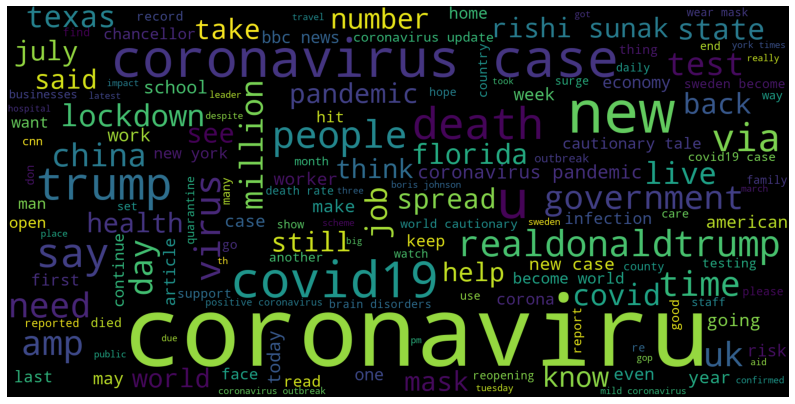

In [156]:
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

**Podemos repetir o processo para os tweets em outro idioma, como o português.**

Utilizaremos o mesmo módulo da biblioteca NLTK, mas com o pacote para o português.

In [157]:
portuguese = df.loc[df.lang == 'pt', 'text']

In [158]:
portuguese

16      URGENTE!\nBOLSONARO VETOU ÁGUA PARA INDÍGENAS ...
22      Bolsonaro veta artigo que prevê acesso a água ...
28      Seria esse alarde com relação ao teste + p/o c...
63      Males que vêm para o bem 👇🏻\n\n⭐ #BBAS3 - Com ...
92      Pandemia do coronavírus deixa 73 países sob ri...
                              ...                        
2381    Caxias do Sul chegou a 24 mortes causadas por ...
2394                  Editorial ✍️https://t.co/kd3fQGaddq
2417    Transmissão do coronavírus volta a acelerar no...
2432    entre os vetos, está a "obrigatoriedade de a U...
2447    UOL Notícias: Coronavírus: OMS não descarta tr...
Name: text, Length: 123, dtype: object

**Podemos juntar as duas funções aplicadas acima e construir uma única, para então aplicar nos dados.**

In [159]:
def Preprocessing(instance):
      instance = re.sub(r"http\S+", "", instance).lower().replace('.', '').replace(';','').replace('-','').replace(':', '').replace(')', '')
      stopwords = set(nltk.corpus.stopwords.words('portuguese'))
      words = [i for i in instance.split() if not i in stopwords]
      return (" ".join(words))

In [160]:
portuguese = [Preprocessing(i) for i in portuguese]

In [161]:
summary_pt = " ".join(s for s in portuguese)

In [162]:
summary_pt

'urgente! bolsonaro vetou água indígenas quilombolas! bolsonaro vetou acesso universal água potável no… bolsonaro veta artigo prevê acesso água potável lei proteção indígenas contra coronavírus | revista… alarde relação teste + p/o coronavirus pres bolsonario uso cloroquina, forma ag… males vêm bem 👇🏻 ⭐ #bbas3 home office, bb vai devolver 19 35 edifícios escritórios país,… pandemia coronavírus deixa 73 países sob risco escassez remédios aids @danielscola @nytimes brazil sempre ignorado mídia americana agora, bolsonaro/coronavírus viramos c… @athaydem pessoas perderam vergonha cara desejo simbólico, difícilmente reinfectado… cooperativismo padre theodor amstad sicredi pioneira rs rs coronavírus – live sicredi pioneira rs destaca… turismo duas cidades goiás casos novo coronavírus lagoa santa domingos ati… após 1 mês tecido capaz eliminar novo coronavírus dois minutos chega mercado #cdmf #cepid… bbc news brasil imprensa internacional destaca negacionismo bolsonaro noticiar diagnóstico pos

In [163]:
wordcloud = WordCloud(background_color="black",
                      width=1600, height=800,
                      max_words=150, max_font_size=200,
                      min_font_size=10).generate(summary_pt)

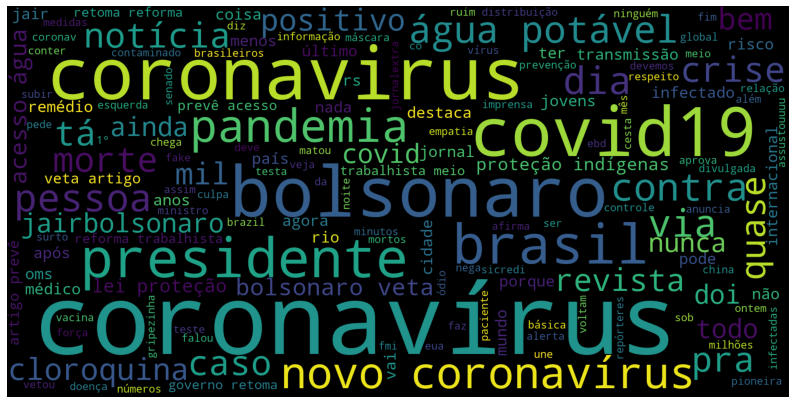

In [164]:
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

# Aplicando Outras Técnicas de Pré-Processamento de Texto

**Stemming é a técnica de reduzir uma palavra para o seu radical. Radical é um morfema básico , indivisível e comum a uma série de palavras.**

Exemplo: O radical de Livro é: Livr

In [165]:
def Aplica_stemming(instancia):
  #Criando uma instância de um Stemmer da biblioteca NLTK.
  stemmer = nltk.stem.RSLPStemmer()
  palavras = []
  #Quebrando a sentença e percorrendo todas as palavras.
  for i in instancia.split():
    #Aplicando a técnica de Stemming nas palavras e as colocando na lista.
    palavras.append(stemmer.stem(i))
  return ("".join(palavras))

**Criando Função que Automatiza a Aplicação das 3 funções, para o português.**

In [166]:
#Criando Função para Pré-Processamento e Limpeza dos Dados. Aplicação de Stemming, remoção de stopwords, padronização de texto e limpeza.
def Preprocessa_dados(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','').replace('@', '')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for word in instancia.split():
      palavras.append(stemmer.stem(word))
    return (" ".join(palavras))

In [ ]:
#Um outro Exemplo de Aplicação do Pré-Processamento em Dados de Texto.
texto = Preprocessa_dados('hoje está bastante frio #...@ !, muito.. https://google.com')
texto

'hoj est bast fri # !, muit'